# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [4]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# 1. Find the linear regression equation for this data.

In [5]:
# Printed the 1t 5 row of the dataset
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [6]:
# checking the shape of the data
df.shape

(15, 2)

In [7]:
# checking the datatype of the data 

df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [8]:
# describing the statistical value

df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [9]:
# checking any null values present in the data or not
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [10]:
# Checking for any duplicate for present in the data or not

df.duplicated().sum()

0

## Exploratory data analysis

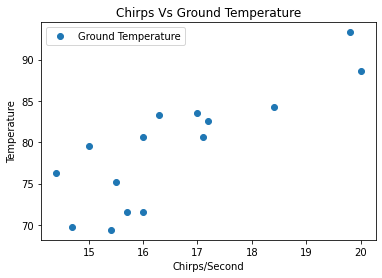

In [11]:
df.plot(x= 'Chirps/Second', y ='Ground Temperature', style = 'o')
plt.title('Chirps Vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Temperature')
plt.show()

## Finding the correlation of the data

In [12]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


## 1. There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.

In [13]:
df['Ground Temperature'].values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [14]:
x = df[['Ground Temperature']].values
       
y = df['Chirps/Second'].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 7)

In [15]:
x_train.shape, y_train.shape 

((10, 1), (10,))

# Modeling 

In [16]:
#Model for algorithm - score = (m * hours) + c

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

In [17]:
regressor.intercept_ # c

-0.1523532669615193

In [18]:
regressor.coef_ # m

array([0.21250288])

In [19]:
regressor.predict([[93]])

array([19.61041474])

## 2. Chart the original data and the equation on the chart.

In [20]:
y_pred = regressor.predict(x_test)
y_pred

array([14.59534673, 15.82786344, 16.76287612, 19.6741656 , 16.97537901])

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,15.4,14.595347
1,15.5,15.827863
2,15.0,16.762876
3,19.8,19.674166
4,16.0,16.975379


## 3. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [22]:
from sklearn import metrics

regressor.score(x_test,y_test)

# on multiple iteration of the model building with different random state ,we found that r2 score has a high variance possible reason
# 1. less data ,Need more of data to predict the target variable better

0.6878301414458603

## 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [23]:
regressor.predict([[95]])

array([20.0354205])

## 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [24]:
chirp_sec = float(input('Enter the chirps/second : '))
# y = mx+c
# x = (y - c)/m
print(f'Expected Ground Temperature : {(chirp_sec - regressor.intercept_)/regressor.coef_}')

Enter the chirps/second : 2
Expected Ground Temperature : [10.1285839]
